In [4]:
%pwd

'd:\\Projects\\Phishing_Detector\\research'

In [5]:
import os 
os.chdir("../")
%pwd

'd:\\Projects\\Phishing_Detector'

In [14]:
import pandas  as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


### `Load the data` 

In [7]:
df = pd.read_csv("phishing_data/NetworkData.csv")
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


## EDA

In [9]:
df.shape

(11055, 31)

> * There are 11055 rows and 31 columns in my dataset 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [ ]:
df.isna().sum() # for cheking missing data 

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

> * There is no missing value in the data 

In [13]:
df.duplicated().sum()

np.int64(5206)

* Almost half of the data is filled with duplicated values - 5206 
* Duplicated can be droped 
> * I would try  with both duplicated and by droping them 

In [15]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
sns.pairplot(df)

> This graph doesn't tell much about data 😏 useless!! wasted my 6min. 9sec 

<Axes: >

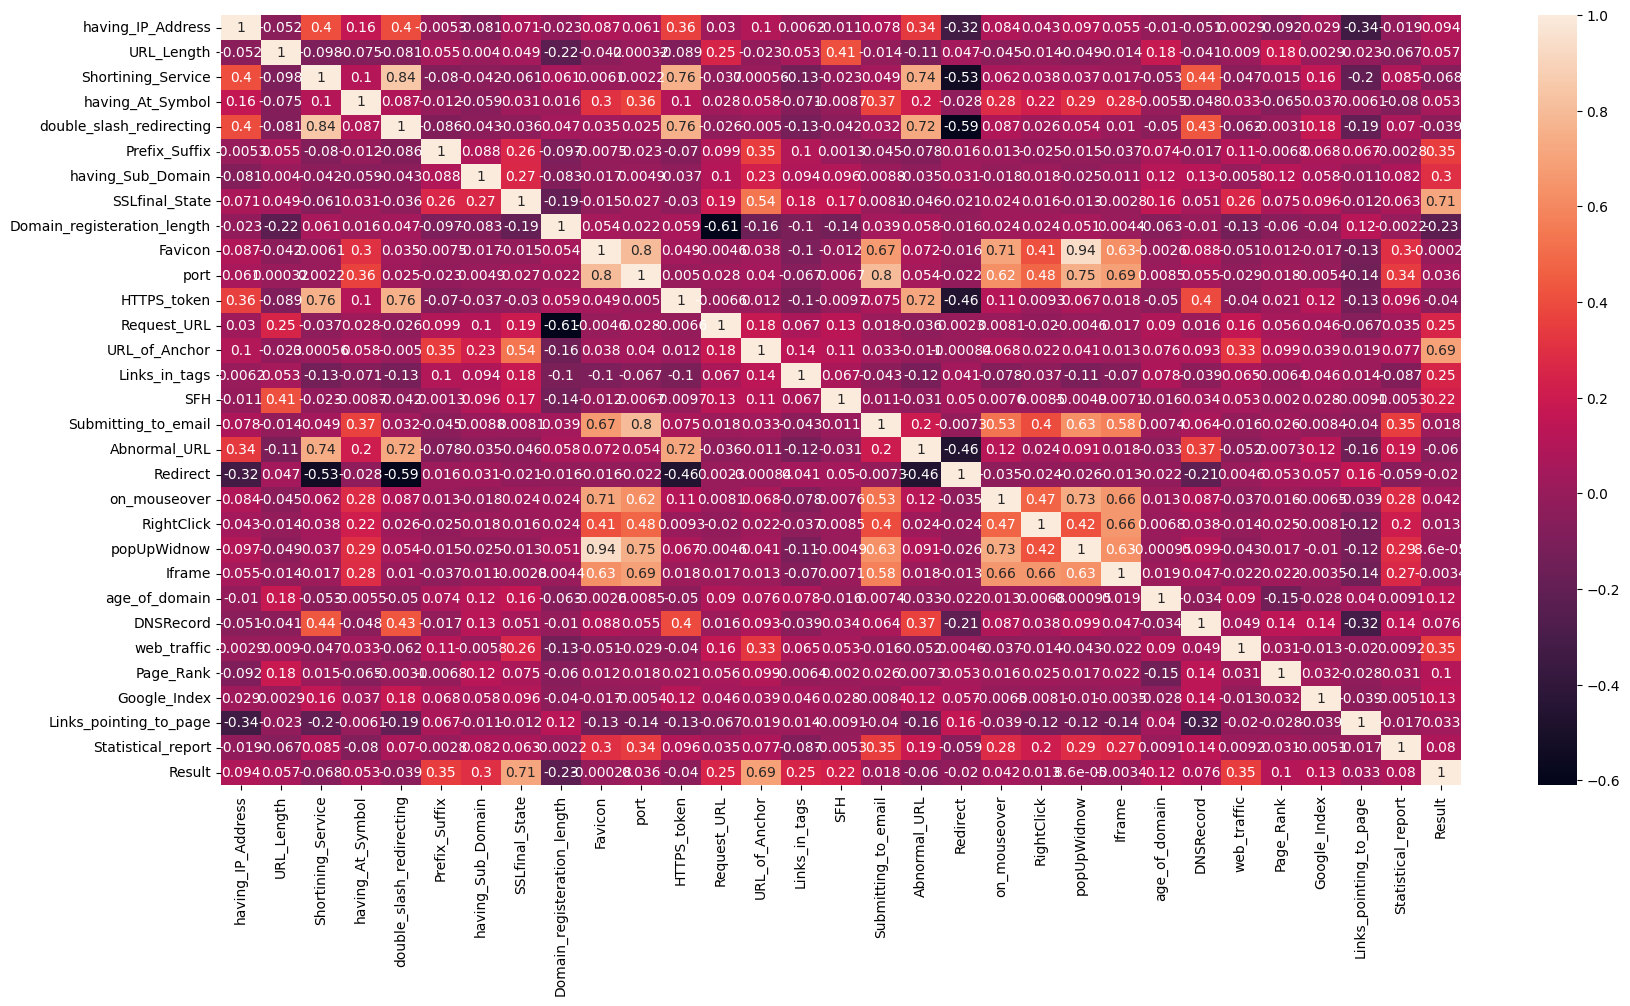

In [19]:
# To identify correlation between features 
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot = True)

#### considered highly correlated features > 85
> There are only two feature which are highly correlated 
>> `popUpWidnow & Favicon`

> I don't think these feature would effect my model much so i would keep them 


In [22]:
df['Abnormal_URL'].unique()

array([-1,  1])

In [23]:
df.skew()

having_IP_Address             -0.661064
URL_Length                     1.636149
Shortining_Service            -2.192571
having_At_Symbol              -1.963891
double_slash_redirecting      -2.210420
Prefix_Suffix                  2.167975
having_Sub_Domain             -0.118125
SSLfinal_State                -0.515502
Domain_registeration_length    0.715423
Favicon                       -1.616655
port                          -2.125709
HTTPS_token                   -1.830363
Request_URL                   -0.380331
URL_of_Anchor                  0.113016
Links_in_tags                  0.202672
SFH                            1.476049
Submitting_to_email           -1.646990
Abnormal_URL                  -1.990042
Redirect                       2.403304
on_mouseover                  -2.354434
RightClick                    -4.502809
popUpWidnow                   -1.553519
Iframe                        -2.833171
age_of_domain                 -0.122725
DNSRecord                     -0.814466


In [45]:
import warnings
warnings.filterwarnings('ignore')

having_IP_Address
 1    7262
-1    3793
Name: count, dtype: int64

URL_Length
-1    8960
 1    1960
 0     135
Name: count, dtype: int64

Shortining_Service
 1    9611
-1    1444
Name: count, dtype: int64

having_At_Symbol
 1    9400
-1    1655
Name: count, dtype: int64

double_slash_redirecting
 1    9626
-1    1429
Name: count, dtype: int64

Prefix_Suffix
-1    9590
 1    1465
Name: count, dtype: int64

having_Sub_Domain
 1    4070
 0    3622
-1    3363
Name: count, dtype: int64

SSLfinal_State
 1    6331
-1    3557
 0    1167
Name: count, dtype: int64

Domain_registeration_length
-1    7389
 1    3666
Name: count, dtype: int64

Favicon
 1    9002
-1    2053
Name: count, dtype: int64

port
 1    9553
-1    1502
Name: count, dtype: int64

HTTPS_token
 1    9259
-1    1796
Name: count, dtype: int64

Request_URL
 1    6560
-1    4495
Name: count, dtype: int64

URL_of_Anchor
 0    5337
-1    3282
 1    2436
Name: count, dtype: int64

Links_in_tags
 0    4449
-1    3956
 1    2650
Name: c

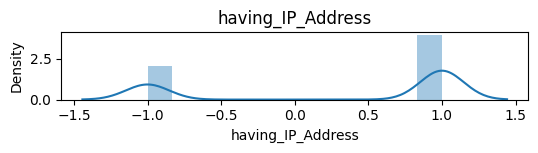

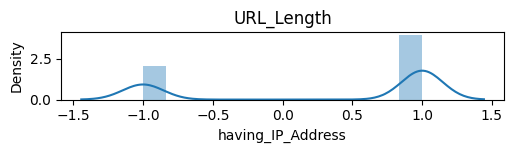

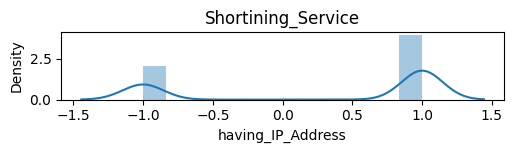

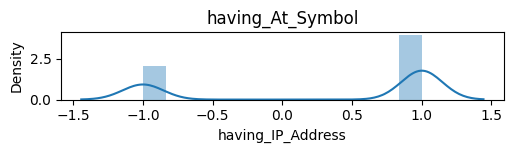

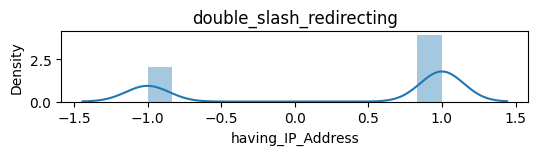

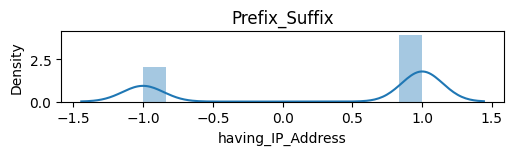

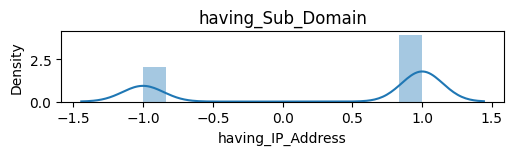

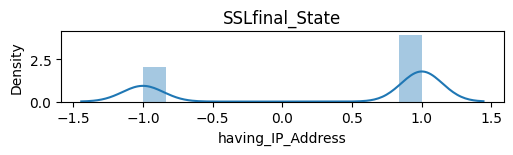

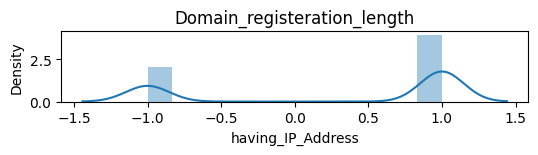

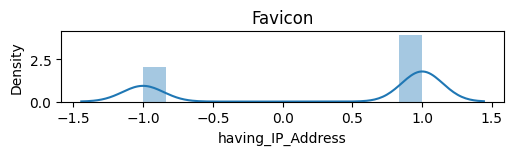

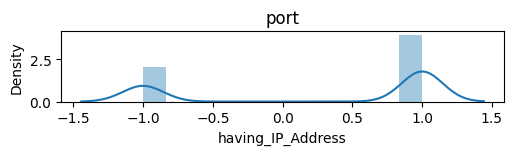

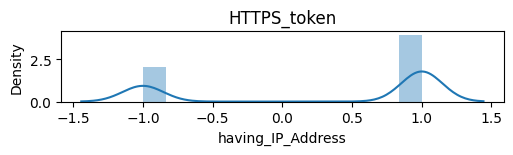

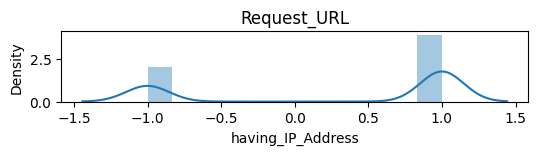

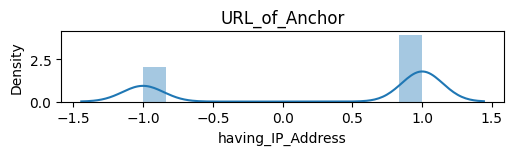

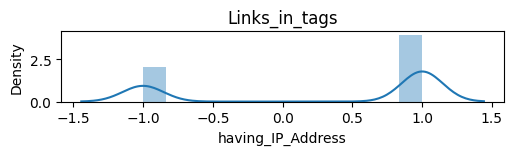

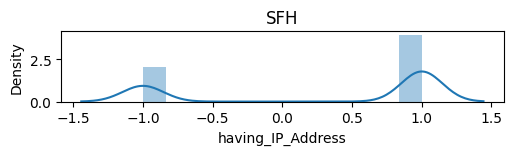

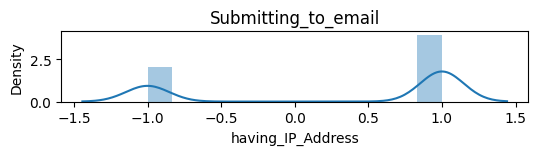

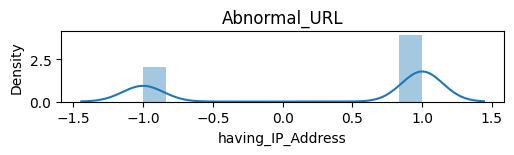

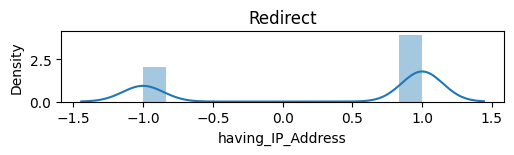

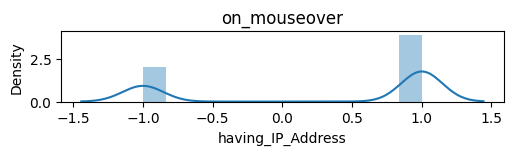

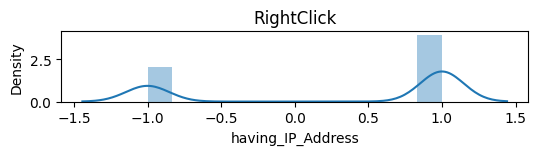

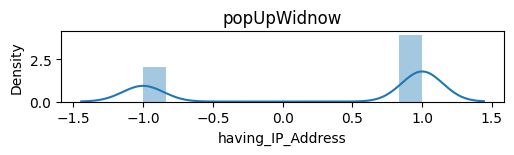

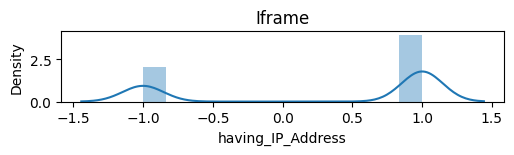

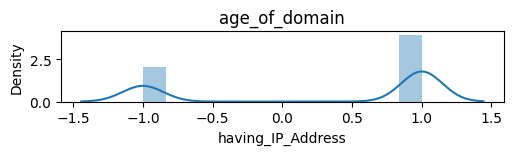

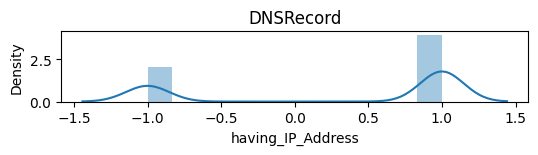

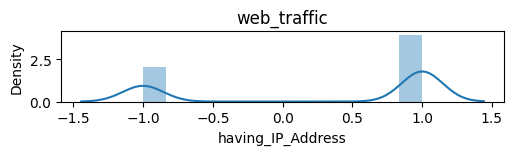

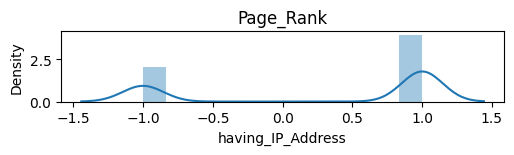

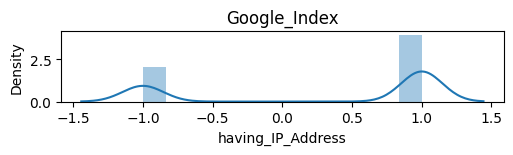

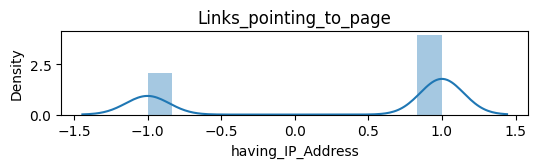

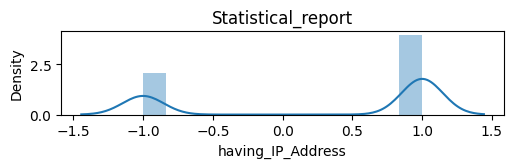

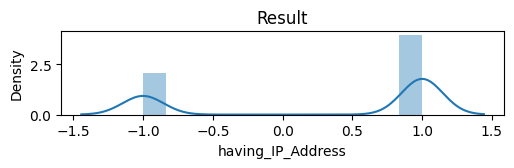

In [53]:
for i in range(len(df.columns)):
    plt.figure(figsize=(20,10))
    plt.subplot(8,4,1+i)
    plt.title(f"{df.columns[i]}")
    sns.distplot(df[df.columns[0]])
    print(df[df.columns[i]].value_counts())
    plt.ticklabel_format(style='scientific')
    plt.tight_layout()
    print()

plt.show()
    

> The data is not normally distributed , Transformation is required 

In [28]:
df.columns.shape

(31,)

Result
 1    6157
-1    4898
Name: count, dtype: int64


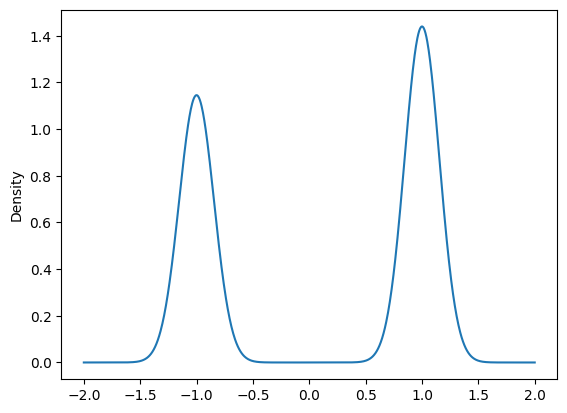

In [44]:
## Check Bias 
df['Result'].plot(kind='kde',)
print(df['Result'].value_counts())

> considered as a balanced data , no requirement of any imbalance data handling technique

### Summary
> * There are 31 columns in the data including target feature and 11055 rows 
> * Data range [-1,0,1] 
> * Duplicated data is present -> Almost half of data [might be droped]
> * Some kind of Transformation is required for making data normally distributed
> * As the data distribution is bimodal , some techniques can be adopt 
>   1. Use Mixed Models (Gaussian Mixture Models - GMM)
>   2. Square Root Transformation

### Dataset Explaination

#### General Information
* Number of entries: 11,055
* Number of columns: 31
* Data type: All features are integer-based (int64), likely representing categorical or ordinal values.

#### Feature Details
```bash
1.  having_IP_Address : - Indicates if the URL contains an IP address. 
    Values might signify:
    -1 : Malicious
     1 : Legitimate


2. URL_Length : Indicates the length of the URL.
   -1 : Suspiciously long URL
    1 : Normal URL length


3. Shortining_Service : Indicates if a URL shortening service is used (e.g., bit.ly).
   -1 : Shortened URL (potentially malicious)
    1 : Not shortened


4. having_At_Symbol : Checks if the URL contains the '@' symbol.
    -1: Contains '@' (malicious)
     1: Does not contain '@'


5. double_slash_redirecting : Checks for redirects using "//" in the URL.
    -1 : Redirecting behavior observed
    1 : No redirecting behavior


6. Prefix_Suffix : Indicates if the domain contains a hyphen ('-').
   -1 : Contains a hyphen (potential phishing)
    1 : Does not contain a hyphen


7. having_Sub_Domain : Measures the number of subdomains.
    -1 : Many subdomains (suspicious)
    0 : Few subdomains (neutral)
    1 : Legitimate


8. SSLfinal_State : Evaluates SSL/TLS certificate state.
    -1 : No/invalid SSL certificate
     1 : Valid SSL certificate


9. Domain_registeration_length : Indicates domain registration period.
    -1 : Short registration period (suspicious)
    1 : Long registration period


10. Favicon : Checks if the favicon is loaded from an external domain.
    -1 : External favicon
    1 : Same domain favicon


11. port : Evaluates port usage.
    -1 : Suspicious port usage
    1 : Standard ports


12. HTTPS_token : Checks for "HTTPS" in the URL but not as a protocol.
    -1 : Misleading use of "HTTPS"
    1 : Proper use or no misuse


13. Request_URL: Measures external object requests.
    -1 : High external object requests
    1 : Low external object requests


14. URL_of_Anchor : Checks if anchor tags link externally.
    -1 : High external linking
    1 : Mostly internal links


15. Links_in_tags : Verifies the use of `<meta>`, `<script>`, and `<link>` tags.
    -1 : High external tag references
    1 : Low external tag references


16. SFH (Server Form Handler) : Indicates where form actions are handled.
    -1 : External handler
    1 : Internal handler


17. Submitting_to_email : Checks if forms submit data to an email.
    -1 : Emails used (suspicious)
    1: No emails used


18. Abnormal_URL: Detects irregularities in the URL structure.
    -1 : Abnormal
    1 : Normal


19. Redirect : Evaluates the number of redirections.
    -1 : Excessive redirections
    1 : Minimal or none


20. on_mouseover : Checks for changes on mouseover.
    -1 : Malicious activity observed
    1 : No activity


21. RightClick : Disables right-click functionality.
    -1 : Disabled
     1 : Enabled


22. popUpWidnow : Checks for pop-up windows.
    -1: Pop-ups present
     1 : No pop-ups


23. Iframe: Detects the presence of iframe tags.
    -1: Iframes present (malicious)
    1: No iframes


24. age_of_domain: Evaluates the age of the domain.
    -1: New domain (suspicious)
    1: Old domain


25. DNSRecord: Checks for DNS records.
     -1: No records (suspicious)
     1: Valid DNS records


26. web_traffic: Measures website traffic.
     -1: Low traffic (suspicious)
     1: High traffic


27. Page_Rank: Page rank of the domain.
     -1: Low rank
     1: High rank


28. Google_Index: Indicates if the domain is indexed by Google.
     -1: Not indexed
     1: Indexed


29. Links_pointing_to_page: Measures backlinks to the page.
     -1: Few/no links
     1: Many links


30. Statistical_report: Evaluates if the site appears in statistical reports for phishing/malware.
     -1: Reported
     1: Not reported


31. Result: Target variable.
     -1: Malicious
     1: Legitimate

```